In [1]:
datadir='/dls/i16/data/2018/cm19668-1/'

import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from matplotlib.pyplot import *
from numpy import *
%matplotlib inline

from dlstools import dataloader
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus2m_path_template)

=== Importing dlstools package
=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'


/dls_sw/i16/software/python/dlstools/dataloader.py:129: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(kwargs['hold'])  #or use hold value
/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/pyplot.py:3238: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


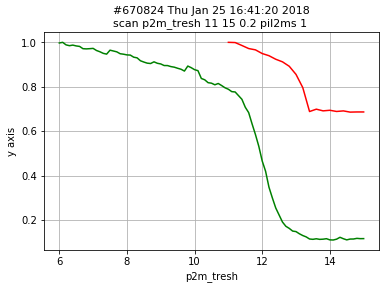

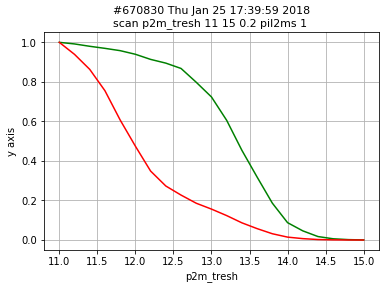

In [2]:
figure()
d(670820) #fluo
d.plot('p2m_tresh', d.sum/max(d.sum),'g', hold=1)
d(670824) #elast
d.plot('p2m_tresh', d.p2mroi1_sum/max(d.p2mroi1_sum),'r', hold=1); grid(1)

#low gain - much better
figure()
d(670825) #elast
d.plot('p2m_tresh', d.p2mroi1_sum/max(d.p2mroi1_sum),'g', hold=1)
d(670830) #elast
d.plot('p2m_tresh', d.p2mroi1_sum/max(d.p2mroi1_sum),'r', hold=1); grid(1)


Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
=== 670844 done
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
=== 670846 done
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
=== 670848 done
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
=== 670850 done
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
=== 670852 done
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
=== 670854 done
Replacing duplicate key 'kphi' with 'kphi1'
Replacing duplicate key 'en' with 'en1'
Replacing duplicate key 'en' with 'en2'
=== 670856 done
Replacing duplicate 

=== 670901 done


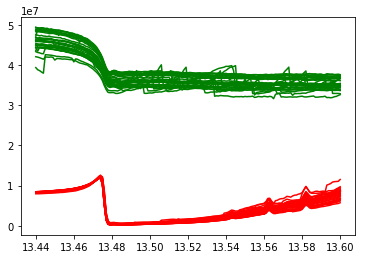

In [3]:
def sum_all_bellow_thesh(scan, maxpix):
    d(scan); p2msum=[]
    for p2m_num in d.path:
        p(p2m_num)
        p2msum+=[sum(p.image_01[p.image_01<maxpix])]
    print "=== %s done" % scan
    return array(p2msum/d.ic1monitor)

figure(); 
for scan in range(670844, 670902+1, 2): #high threshhold (elast.)
    p2mnormsum=sum_all_bellow_thesh(scan,100)
    plot(d.energy2, p2mnormsum,'g', hold=1)

plotfac=0.1;
for scan in range(670844+1, 670902+1, 2): #low threshhold (fluo.)
    p2mnormsum=sum_all_bellow_thesh(scan,100)
    plot(d.energy2, p2mnormsum*plotfac,'r', hold=1)

savefig('/home/spc93/tmp/tmp.pdf')

